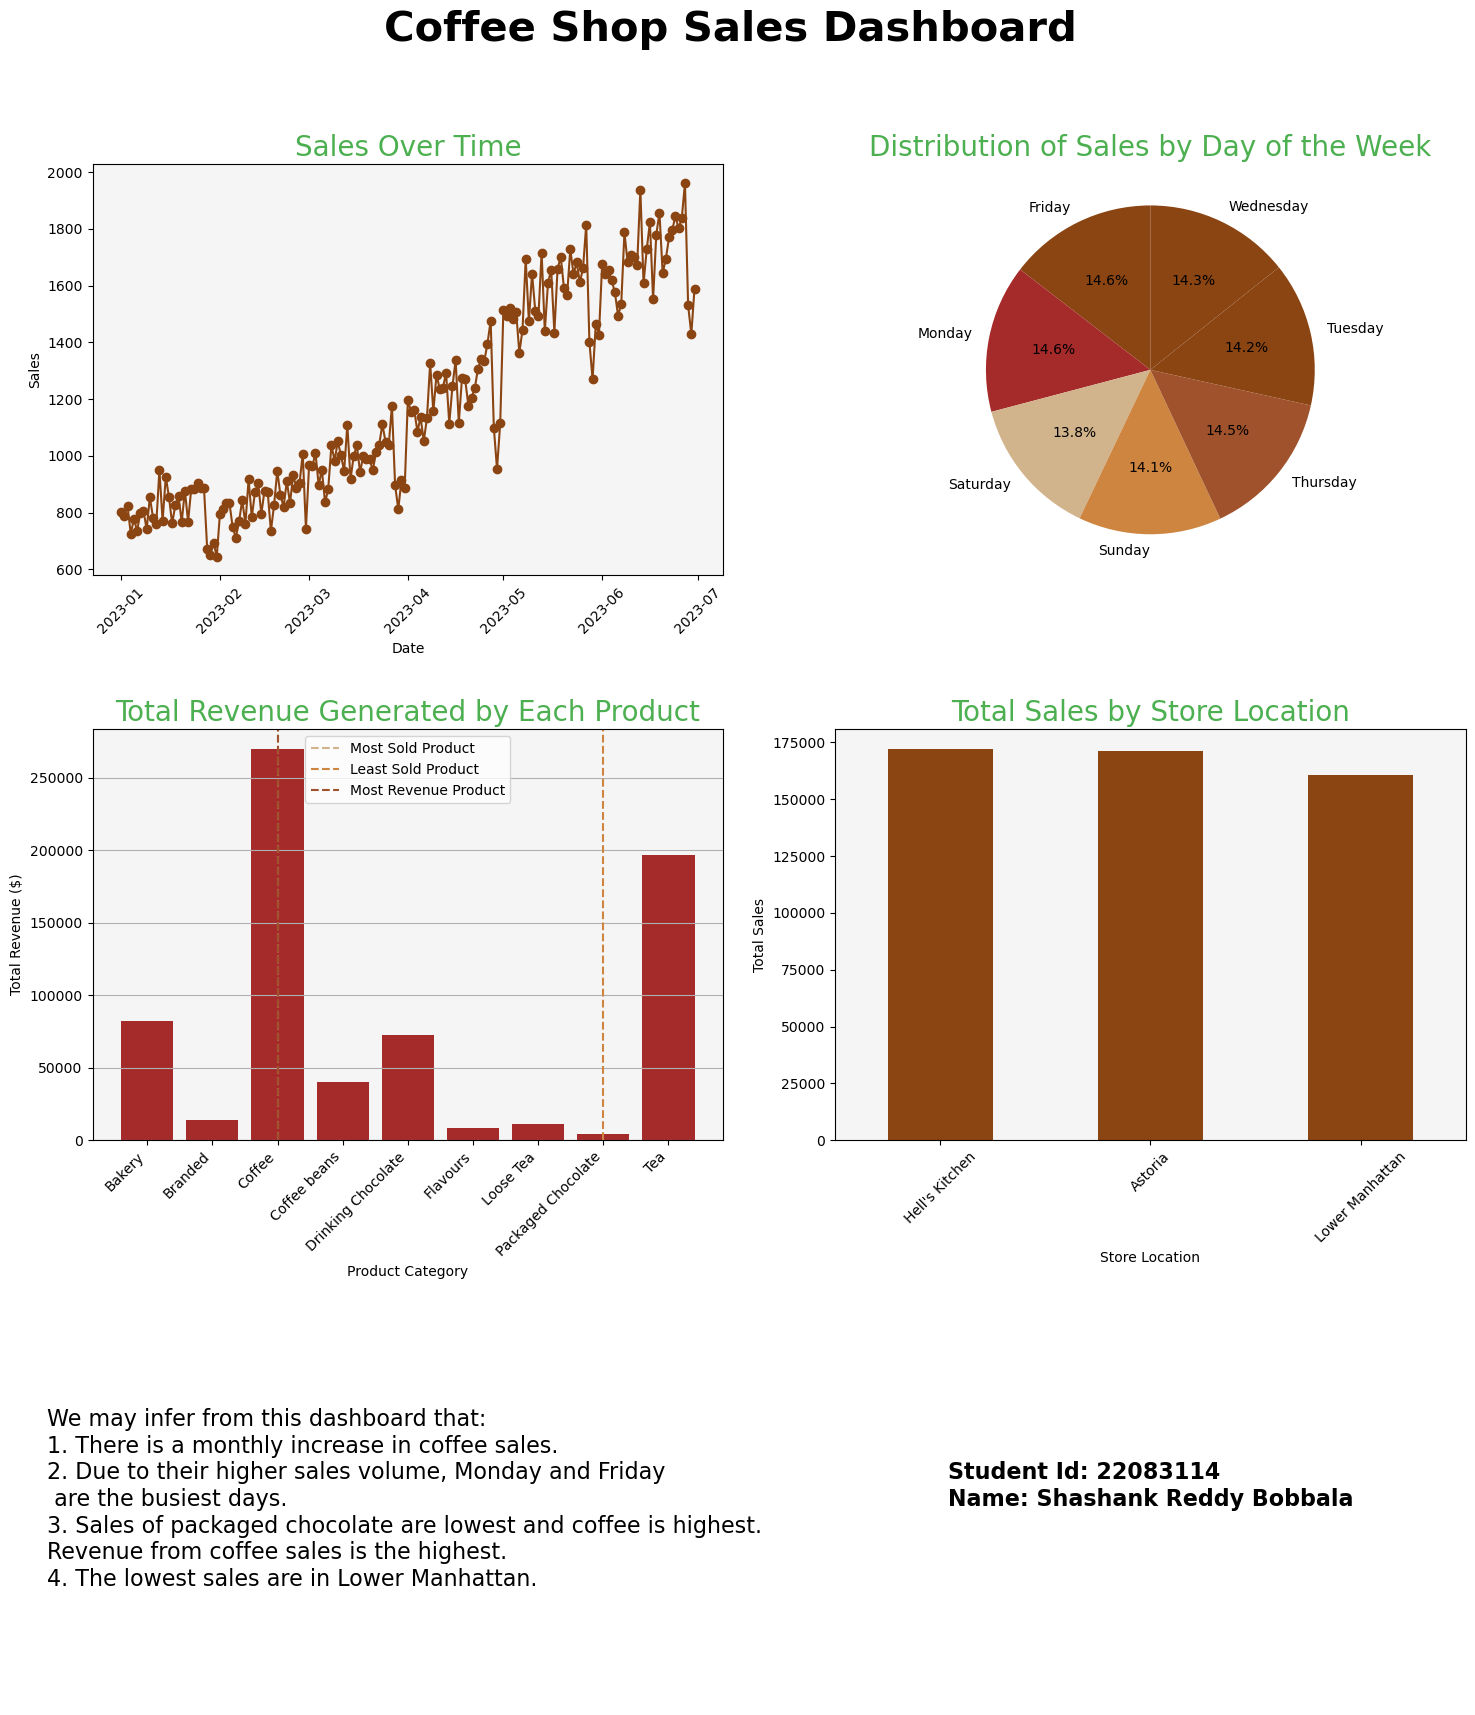

In [2]:
# Datasource Link: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales/data
# Github link :

""" Importing Required Libraries"""
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Load data
file_path = 'Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)
df['datetime'] = pd.to_datetime(df['transaction_date'] , format='%m/%d/%y')
df['day_of_week'] = df['datetime'].dt.day_name()

# Group by date and sum the sales quantity
sales_trend = df.groupby(df['datetime'].dt.date)['transaction_qty'].sum()

# Group by day of the week and calculate the total sales quantity
daily_sales = df.groupby('day_of_week')['transaction_qty'].sum()

# Group by product category and calculate total quantity sold and revenue
product_sales = df.groupby('product_category')['transaction_qty'].sum()
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
product_revenue = df.groupby('product_category')['total_revenue'].sum()

# Find the most and least sold products
most_sold_product = product_sales.idxmax()
least_sold_product = product_sales.idxmin()

# Find the product driving the most revenue
most_revenue_product = product_revenue.idxmax()

# Group by store location and calculate total sales
store_sales = df.groupby('store_location')['unit_price']\
    .sum().sort_values(ascending=False)

# Define a coffee-themed color palette
coffee_palette = ['#8B4513' , '#A52A2A' , '#D2B48C' ,
                  '#CD853F' , '#A0522D' , '#8B4513']

# Create subplots for the dashboard
fig = plt.figure(figsize=(15 , 18))
plt.suptitle('Coffee Shop Sales Dashboard' ,
             fontsize=30 , fontweight='bold')

gs = GridSpec(3 , 2 , figure=fig)

# Sales Trend Over Time
ax1 = fig.add_subplot(gs[0 , 0])
ax1.plot(sales_trend.index , sales_trend.values , marker='o' ,
         linestyle='-' , color=coffee_palette[0])
ax1.set_title('Sales Over Time' , fontsize=20 , color='#4CAF50')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x' , rotation=45)
ax1.set_facecolor('#F5F5F5')  # Light gray background

# Distribution of Sales by Day of the Week (Pie Chart)
ax2 = fig.add_subplot(gs[0 , 1])
ax2.pie(daily_sales , labels=daily_sales.index , autopct='%1.1f%%' ,
        startangle=90 , colors=coffee_palette)
ax2.set_title('Distribution of Sales by Day of the Week' , fontsize=20 ,
              color='#4CAF50')  # Green title
ax2.set_facecolor('#F5F5F5')  # Light gray background

# Total Revenue Generated by Each Product (Bar Chart)
ax3 = fig.add_subplot(gs[1 , 0])
ax3.bar(product_revenue.index , product_revenue.values , color=coffee_palette[1])
ax3.set_title('Total Revenue Generated by Each Product' , fontsize=20 , color='#4CAF50')
ax3.set_xlabel('Product Category')
ax3.set_ylabel('Total Revenue ($)')
ax3.set_xticks(product_revenue.index)
ax3.set_xticklabels(product_revenue.index , rotation=45 , ha='right')
ax3.grid(axis='y')
ax3.axvline(x=most_sold_product , color=coffee_palette[2] ,
            linestyle='--' , label='Most Sold Product')
ax3.axvline(x=least_sold_product , color=coffee_palette[3] ,
            linestyle='--' , label='Least Sold Product')
ax3.axvline(x=most_revenue_product, color=coffee_palette[4] ,
            linestyle='--' , label='Most Revenue Product')
ax3.legend()
ax3.set_facecolor('#F5F5F5')

# Total Sales by Store Location (Bar Chart)
ax4 = fig.add_subplot(gs[1 , 1])
store_sales.plot(kind='bar' , color=coffee_palette[5] , ax=ax4)
ax4.set_title('Total Sales by Store Location',
              fontsize=20 , color='#4CAF50')  # Green title
ax4.set_xlabel('Store Location')
ax4.set_ylabel('Total Sales')
ax4.tick_params(axis='x' , rotation=45)
ax4.set_facecolor('#F5F5F5')  # Light gray background

# Inferring Information
ax5 = fig.add_subplot(gs[2 , 0])
inferred_info = (
    "We may infer from this dashboard that:\n"
    "1. There is a monthly increase in coffee sales.\n"
    "2. Due to their higher sales volume, Monday and Friday\n"
    " are the busiest days.\n"
    "3. Sales of packaged chocolate are lowest and coffee is highest. \n"
    "Revenue from coffee sales is the highest.\n"
    "4. The lowest sales are in Lower Manhattan."
)
ax5.text(0.5 , 0.5 , inferred_info , ha='center' , va='center' ,
         fontsize=16 , color='black' , multialignment='left')
ax5.axis('off')
ax5.set_facecolor('#F5F5F5')  # Light gray background

# Student Information
ax6 = fig.add_subplot(gs[2 , 1])
inferred_info = (
    "Student Id: 22083114 \n"
    "Name: Shashank Reddy Bobbala\n"
)
ax6.text(0.5 , 0.5 , inferred_info , ha='center' , va='center' ,
         fontsize=16 , color='black' , multialignment='left' ,
         fontweight='bold')
ax6.axis('off')
ax6.set_facecolor('#F5F5F5')  # Light gray background

# Adjust layout
plt.tight_layout(rect=[0 , 0.03 , 1 , 0.95])

# Save the dashboard as a PNG file
# plt.savefig('22083114.png' , dpi=300)


plt.show()